In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from skimage.feature import hog

In [4]:
dataset_path = "BoneFractureYolo8"


In [5]:
# Folder for images and labels
train_image_dir = os.path.join(dataset_path, 'train', 'images')
train_label_dir = os.path.join(dataset_path, 'train', 'labels')

# List of image and label files
train_image_files = sorted([f for f in os.listdir(train_image_dir) if f.endswith('.jpg')])
train_label_files = sorted([f for f in os.listdir(train_label_dir) if f.endswith('.txt')])


In [6]:
# Function to read labels from the label file
def fetch_label(file_path):
    with open(file_path, 'r') as file:
        label_content = file.readline().strip()
        if not label_content:  
            return None
        return int(label_content[0])  
    
# Initialize a list to store images and labels
images = []
labels = []
IMG_SIZE = 256

In [7]:
#Load images and labels
for image_file, label_file in zip(train_image_files, train_label_files):
    image_path = os.path.join(train_image_dir, image_file)
    label_path = os.path.join(train_label_dir, label_file)

    # Reading labels for images
    label = fetch_label(label_path)
    if label is None:  # Lewati jika label kosong
        continue

    # Reading and processing images
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    images.append(image)

    labels.append(label)

# onvert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [26]:
# HOG feature extraction (Histogram of Oriented Gradients)
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Covnvert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        features, _ = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys',
                          visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

# HOG feature extraction from an image
hog_features = extract_hog_features(images)

# Split the dataset into training and validation"
X_train, X_val, y_train, y_val = train_test_split(hog_features, labels, test_size=0.25)#, stratify=labels)

# Model KNN
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        65
           1       0.84      0.85      0.84       115
           2       0.86      0.69      0.76        87
           4       0.74      0.83      0.78        60
           5       0.88      0.90      0.89        88
           6       0.79      0.86      0.83        36

    accuracy                           0.82       451
   macro avg       0.81      0.82      0.82       451
weighted avg       0.82      0.82      0.82       451



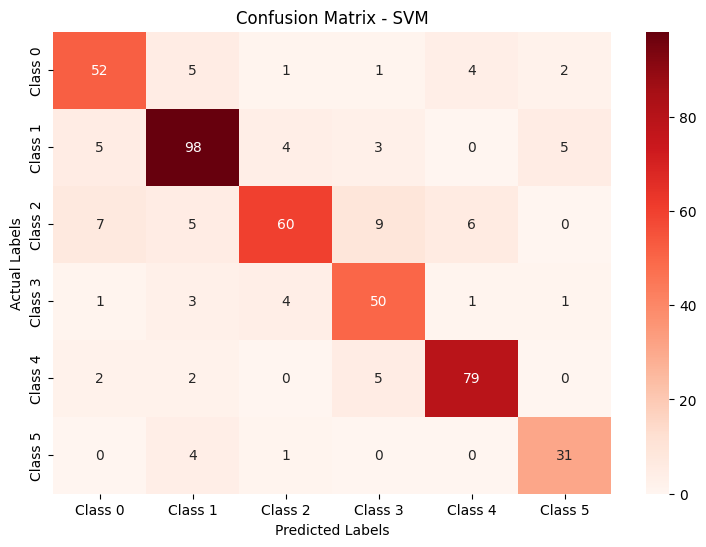

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.72      0.69        65
           1       0.60      0.82      0.69       115
           2       0.89      0.46      0.61        87
           4       0.75      0.70      0.72        60
           5       0.79      0.84      0.81        88
           6       0.64      0.50      0.56        36

    accuracy                           0.70       451
   macro avg       0.72      0.67      0.68       451
weighted avg       0.72      0.70      0.69       451



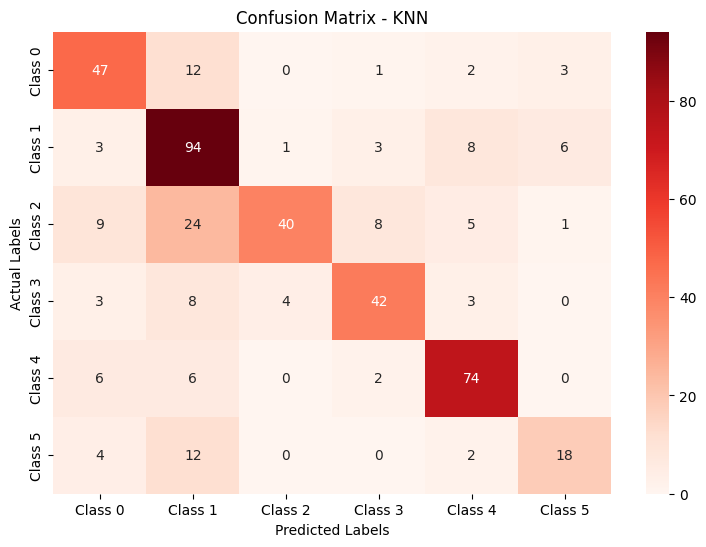

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Train SVM Model
svm_model = SVC(kernel='linear', random_state=69)
svm_model.fit(X_train, y_train)

# Eval SVM
svm_predictions = svm_model.predict(X_val)

# Print classification report
print("SVM Classification Report:")
print(classification_report(y_val, svm_predictions))

# Confusion Matrix
svm_conf_matrix = confusion_matrix(y_val, svm_predictions)

# Visualize Confusion Matrix for SVM
def plot_confusion_matrix(cm, class_names, title="Confusion Matrix"):
    plt.figure(figsize=(9, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title(title)
    plt.show()

# Define class labels (adjust class names if using one-hot encoding)
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_conf_matrix, class_names, title="Confusion Matrix - SVM")

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

# Evaluate KNN
knn_predictions = knn_model.predict(X_val)

# Print classification report
print("KNN Classification Report:")
print(classification_report(y_val, knn_predictions))

# Confusion Matrix
knn_conf_matrix = confusion_matrix(y_val, knn_predictions)

# Plot confusion matrix for KNN
plot_confusion_matrix(knn_conf_matrix, class_names, title="Confusion Matrix - KNN")


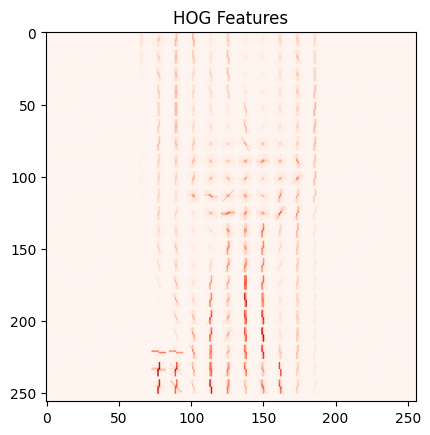

In [45]:
# Visualize HOG features (optional)
# Visualize HOG for one image
sample_image = images[0]
gray_sample = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
features, hog_image = hog(gray_sample, orientations=10, pixels_per_cell=(12, 12),
                          cells_per_block=(10, 10), block_norm='L2-Hys',
                          visualize=True)
plt.imshow(hog_image, cmap='Reds')
plt.title("HOG Features")
plt.show()

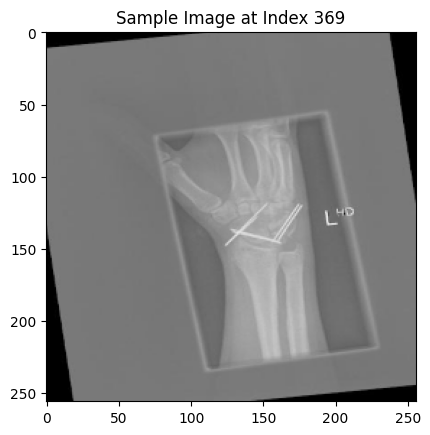

In [46]:
# Ensure the index used is valid
index_to_visualize = 369
if index_to_visualize < len(images):
    sample_image = images[index_to_visualize]
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Sample Image at Index {index_to_visualize}")
    plt.show()
else:
    print(f"Index {index_to_visualize} is out of bounds for dataset size {len(images)}.")


In [47]:
import os
import cv2
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from skimage.feature import hog
import matplotlib.pyplot as plt

from sklearn.svm import SVR


# Set random seed for reproducibility
SEED =69
np.random.seed(SEED)

# Function to extract features manually
def extract_features(image):
    """
    Extract features from the given image using HOG, edge detection, and grayscale intensities.
    """
    # Resize to a fixed size
    image = cv2.resize(image, (128, 128))

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # HOG Features
    hog_features, _ = hog(
        gray, 
        orientations=10, 
        pixels_per_cell=(12, 12), 
        cells_per_block=(10, 10), 
        visualize=True, 
        block_norm="L2-Hys"
    )

    # Edge detection
    edges = cv2.Canny(gray, 50, 150)
    edge_features = edges.flatten() / 255.0  # Normalize edge intensities

    # Flatten grayscale image intensities
    gray_features = gray.flatten() / 255.0

    # Combine all features
    combined_features = np.concatenate([hog_features, edge_features, gray_features])
    return combined_features

# Load dataset annotations
def load_annotations(annotations_file):
    """
    Load COCO-style annotations and prepare them.
    """
    with open(annotations_file, 'r') as f:
        data = json.load(f)
    annotations = []
    for item in data['images']:
        anns = [ann for ann in data['annotations'] if ann['image_id'] == item['id']]
        annotations.append({"file_name": item['file_name'], "annotations": anns})
    return annotations

# Prepare data
def prepare_dataset(annotations, image_dir):
    """
    Prepare the dataset by extracting features and target bounding box coordinates.
    """
    X = []
    y = []
    for record in annotations:
        img_path = os.path.join(image_dir, record['file_name'])
        image = cv2.imread(img_path)

        # Skip images without annotations
        if len(record['annotations']) == 0:
            continue

        # Extract bounding box (x, y, width, height)
        bbox = record['annotations'][0]['bbox']

        # Extract features from the image
        features = extract_features(image)

        X.append(features)
        y.append(bbox)

    return np.array(X), np.array(y)

# Load annotations
train_annotations = load_annotations("BoneFractureYolo8/train_annotations.coco.json")
valid_annotations = load_annotations("BoneFractureYolo8/valid_annotations.coco.json")

# Filter only images with annotations
train_annotations = [ann for ann in train_annotations if len(ann['annotations']) > 0]
valid_annotations = [ann for ann in valid_annotations if len(ann['annotations']) > 0]

# Extract features and bounding boxes
train_images_dir = "BoneFractureYolo8/train/images"
valid_images_dir = "BoneFractureYolo8/valid/images"

X_train, y_train = prepare_dataset(train_annotations, train_images_dir)
X_valid, y_valid = prepare_dataset(valid_annotations, valid_images_dir)


Validation MSE: 4366.4987
Mean IoU: 0.0614


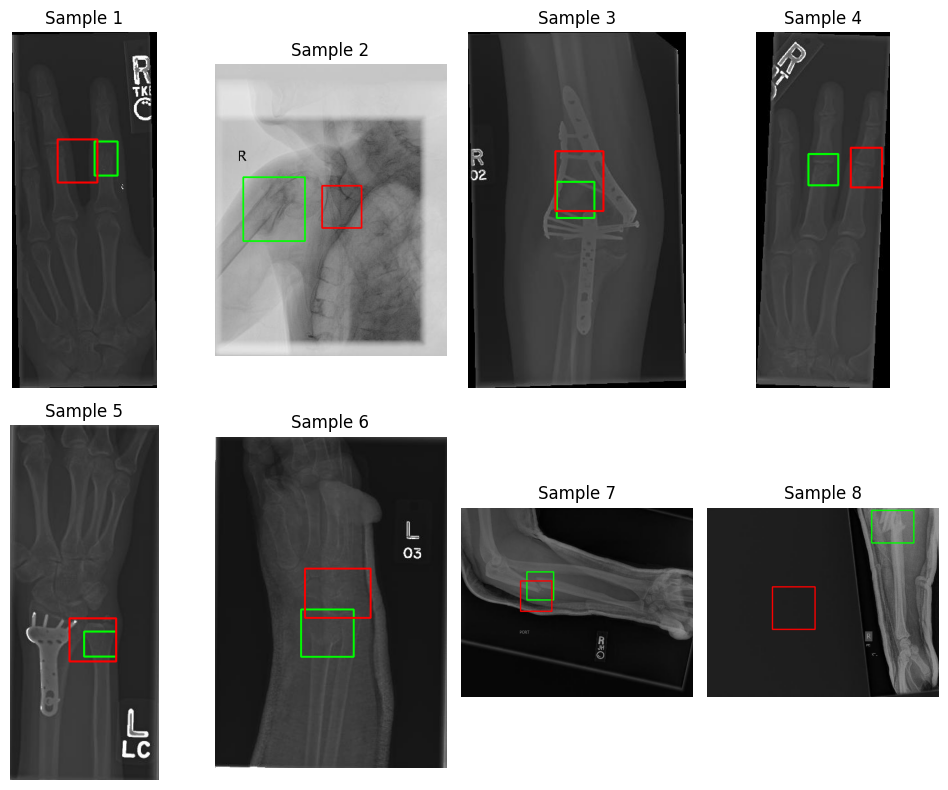

In [48]:

# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=4)

# Train the KNN regressor
knn.fit(X_train, y_train)

# Predict on the validation set
y_pred = knn.predict(X_valid)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f"Validation MSE: {mse:.4f}")

# Evaluate Intersection over Union (IoU) for accuracy
def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) for two bounding boxes.
    """
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    xi1, yi1 = max(x1, x2), max(y1, y2)
    xi2, yi2 = min(x1 + w1, x2 + w2), min(y1 + h1, y2 + h2)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0.0

# Calculate IoU scores
ious = [calculate_iou(pred, true) for pred, true in zip(y_pred, y_valid)]
mean_iou = np.mean(ious)
print(f"Mean IoU: {mean_iou:.4f}")

# Plot sample predictions
def plot_predictions(X, y_true, y_pred, images_dir, annotations):
    """
    Plot true and predicted bounding boxes on a few sample images.
    """
    fig, axs = plt.subplots(2, 4, figsize=(10, 8))
    for i, ax in enumerate(axs.flat):
        if i >= len(X):
            break

        # Get the image
        img_path = os.path.join(images_dir, annotations[i]['file_name'])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw true bounding box
        true_box = y_true[i]
        cv2.rectangle(
            image,
            (int(true_box[0]), int(true_box[1])),
            (int(true_box[0] + true_box[2]), int(true_box[1] + true_box[3])),
            (0, 255, 0),
            2,
        )

        # Draw predicted bounding box
        pred_box = y_pred[i]
        cv2.rectangle(
            image,
            (int(pred_box[0]), int(pred_box[1])),
            (int(pred_box[0] + pred_box[2]), int(pred_box[1] + pred_box[3])),
            (255, 0, 0),
            2,
        )

        ax.imshow(image)
        ax.set_title(f"Sample {i + 1}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Plot predictions
plot_predictions(X_valid[:8], y_valid[:8], y_pred[:8], valid_images_dir, valid_annotations)


SVM

Validation MSE: 3682.0398
Mean IoU: 0.0731


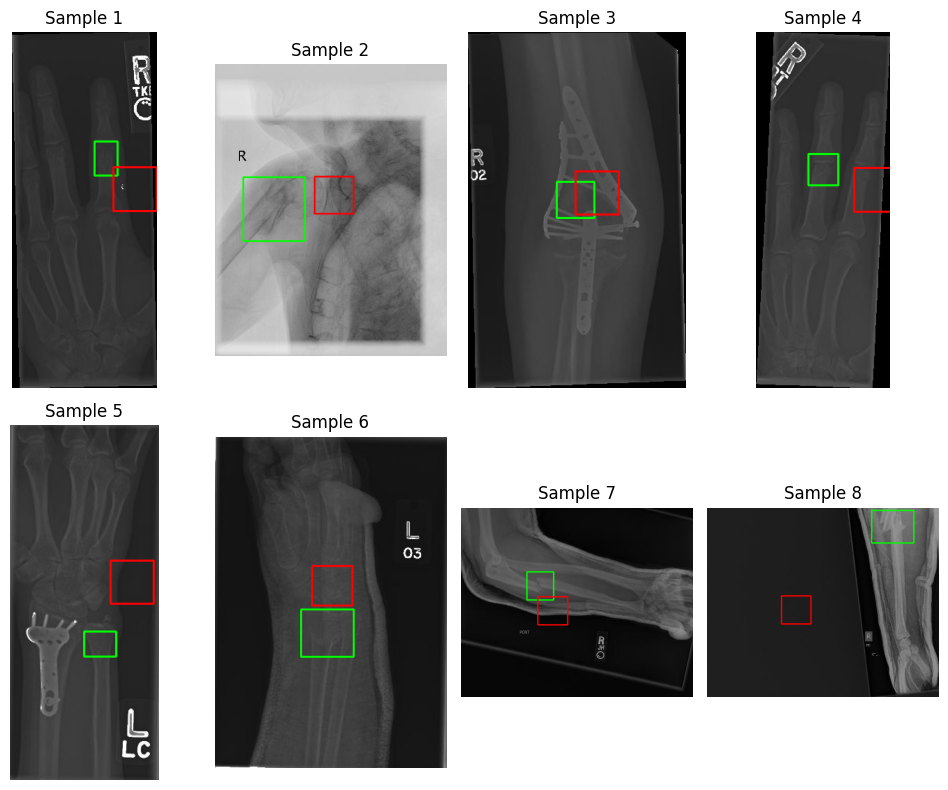

In [49]:

# Train an SVM for each coordinate (x, y, width, height)
svm_models = []
for i in range(4):
    svm = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    svm.fit(X_train, y_train[:, i])
    svm_models.append(svm)

# Predict on validation set
y_pred = np.zeros_like(y_valid)
for i, svm in enumerate(svm_models):
    y_pred[:, i] = svm.predict(X_valid)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f"Validation MSE: {mse:.4f}")

# Evaluate Intersection over Union (IoU) for accuracy
def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) for two bounding boxes.
    """
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    xi1, yi1 = max(x1, x2), max(y1, y2)
    xi2, yi2 = min(x1 + w1, x2 + w2), min(y1 + h1, y2 + h2)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0.0

# Calculate IoU scores
ious = [calculate_iou(pred, true) for pred, true in zip(y_pred, y_valid)]
mean_iou = np.mean(ious)
print(f"Mean IoU: {mean_iou:.4f}")

# Plot sample predictions
def plot_predictions(X, y_true, y_pred, images_dir, annotations):
    """
    Plot true and predicted bounding boxes on a few sample images.
    """
    fig, axs = plt.subplots(2, 4, figsize=(10, 8))
    for i, ax in enumerate(axs.flat):
        if i >= len(X):
            break

        # Get the image
        img_path = os.path.join(images_dir, annotations[i]['file_name'])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw true bounding box
        true_box = y_true[i]
        cv2.rectangle(
            image,
            (int(true_box[0]), int(true_box[1])),
            (int(true_box[0] + true_box[2]), int(true_box[1] + true_box[3])),
            (0, 255, 0),
            2,
        )

        # Draw predicted bounding box
        pred_box = y_pred[i]
        cv2.rectangle(
            image,
            (int(pred_box[0]), int(pred_box[1])),
            (int(pred_box[0] + pred_box[2]), int(pred_box[1] + pred_box[3])),
            (255, 0, 0),
            2,
        )

        ax.imshow(image)
        ax.set_title(f"Sample {i + 1}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Plot predictions
plot_predictions(X_valid[:8], y_valid[:8], y_pred[:8], valid_images_dir, valid_annotations)
